## Task 5: Analyze traffic accident data to identify patterns related to road conditions, weather, and time of day. Visualize accident hotspots and contributing factors.



### import libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### load dataset

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/GauriPaithankar/Datasets/main/accident_data.csv")

### data exploration

In [3]:
df.shape

(147, 17)

In [4]:
df.head(5)

,Date,Time,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,05-01-2022,15:30:00,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,10-02-2022,18:45:00,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022
2,15-03-2022,12:00:00,37.7749,-122.4194,Intersection,Clear,Dry,Clear,Collision,Moderate,Weather,Car,2,25,Tuesday,March,2022
3,20-04-2022,09:20:00,34.0522,-118.2437,Highway,Clear,Dry,Clear,Collision,Minor,Other,Car,2,35,Wednesday,April,2022
4,25-05-2022,17:10:00,40.7128,-74.0060,Street,Rainy,Wet,Poor,Collision,Severe,Speeding,Car,1,50,Wednesday,May,2022


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 147 entries, 0 to 146
Data columns (total 17 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  147 non-null    object 
 1   Time                  147 non-null    object 
 2   Latitude              147 non-null    float64
 3   Longitude             147 non-null    float64
 4   Location Description  147 non-null    object 
 5   Weather Conditions    147 non-null    object 
 6   Road Conditions       147 non-null    object 
 7   Visibility            147 non-null    object 
 8   Accident Type         147 non-null    object 
 9   Injury Severity       147 non-null    object 
 10  Contributing Factors  147 non-null    object 
 11  Vehicle Type          147 non-null    object 
 12  No of Vehichles       147 non-null    int64  
 13  Vehicle Speed         147 non-null    int64  
 14  Day of Week           147 non-null    object 
 15  Month                 1

In [6]:
df.describe()

,Latitude,Longitude,No of Vehichles,Vehicle Speed,Year
count,147.000000,147.000000,147.000000,147.000000,147.000000
mean,38.325525,-98.649265,1.428571,38.843537,2022.979592
std,3.197276,20.962406,0.496564,8.110285,0.823203
min,34.052200,-122.419400,1.000000,25.000000,2022.000000
25%,34.052200,-118.243700,1.000000,30.000000,2022.000000
50%,40.712800,-87.629800,1.000000,35.000000,2023.000000
75%,40.712800,-74.006000,2.000000,45.000000,2024.000000
max,41.878100,-74.006000,2.000000,55.000000,2024.000000


### drop date & time column

In [7]:
df.drop(['Date','Time'], axis=1, inplace=True)

In [8]:
df.head(2)

,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,40.7128,-74.0060,Highway,Foggy,Wet,Poor,Collision,Moderate,Speeding,Truck,1,45,Wednesday,January,2022
1,41.8781,-87.6298,Street,Rainy,Wet,Poor,Rollover,Severe,Drunk Driving,Motorcycle,1,40,Thursday,February,2022


### label encoding

In [9]:
from sklearn import preprocessing 

In [10]:
 label_encoder = preprocessing.LabelEncoder()

In [11]:
df['Location Description']= label_encoder.fit_transform(df['Location Description']) 

In [12]:
df['Weather Conditions']= label_encoder.fit_transform(df['Weather Conditions']) 

In [13]:
df['Road Conditions']= label_encoder.fit_transform(df['Road Conditions']) 

In [14]:
df['Visibility']= label_encoder.fit_transform(df['Visibility']) 

In [15]:
df['Accident Type']= label_encoder.fit_transform(df['Accident Type']) 

In [16]:
df['Injury Severity']= label_encoder.fit_transform(df['Injury Severity']) 

In [17]:
df['Contributing Factors']= label_encoder.fit_transform(df['Contributing Factors']) 

In [18]:
df['Vehicle Type']= label_encoder.fit_transform(df['Vehicle Type']) 

In [19]:
df['Day of Week']= label_encoder.fit_transform(df['Day of Week']) 

In [20]:
df['Month']= label_encoder.fit_transform(df['Month']) 

In [21]:
df.head(10)

,Latitude,Longitude,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,No of Vehichles,Vehicle Speed,Day of Week,Month,Year
0,40.7128,-74.0060,0,1,1,1,0,1,3,2,1,45,3,4,2022
1,41.8781,-87.6298,2,2,1,1,1,2,1,1,1,40,1,3,2022
2,37.7749,-122.4194,1,0,0,0,0,1,4,0,2,25,2,7,2022
3,34.0522,-118.2437,0,0,0,0,0,0,2,0,2,35,3,0,2022
4,40.7128,-74.0060,2,2,1,1,0,2,3,0,1,50,3,8,2022
5,41.8781,-87.6298,1,0,0,0,1,0,0,2,1,35,1,6,2022
6,34.0522,-118.2437,2,0,0,0,0,1,3,0,2,40,0,5,2022
7,40.7128,-74.0060,0,2,1,1,1,2,1,1,1,30,3,1,2022
8,37.7749,-122.4194,1,0,0,0,0,1,4,0,2,35,1,11,2022
9,34.0522,-118.2437,0,0,0,0,0,0,2,0,2,45,3,10,2022


### round off

In [22]:
df.Latitude.apply(np.round)

0      41.0
1      42.0
2      38.0
3      34.0
4      41.0
       ... 
142    41.0
143    38.0
144    34.0
145    41.0
146    42.0
Name: Latitude, Length: 147, dtype: float64

In [23]:
df.Longitude.apply(np.round)

0      -74.0
1      -88.0
2     -122.0
3     -118.0
4      -74.0
       ...  
142    -74.0
143   -122.0
144   -118.0
145    -74.0
146    -88.0
Name: Longitude, Length: 147, dtype: float64

### checking for correlation

<Axes: >

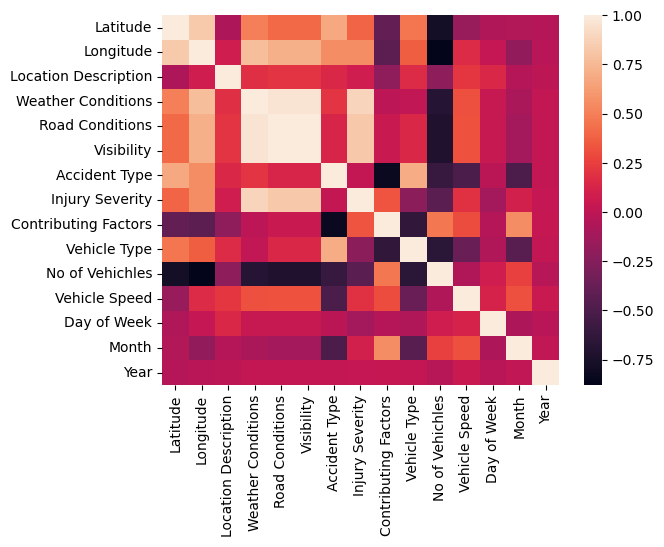

In [24]:
sns.heatmap(df.corr())

### check for duplicate values

In [25]:
df.duplicated().sum()

110

### checking for outliers 

<Axes: >

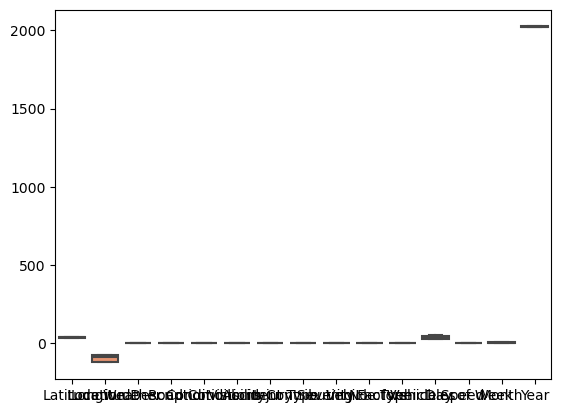

In [26]:
sns.boxplot(df)

### visualization

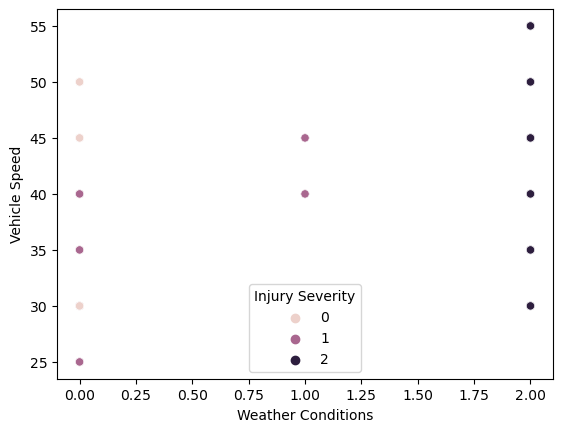

In [27]:
sns.scatterplot(x='Weather Conditions', y='Vehicle Speed', hue='Injury Severity',data=df)
plt.show()

<Axes: xlabel='Injury Severity'>

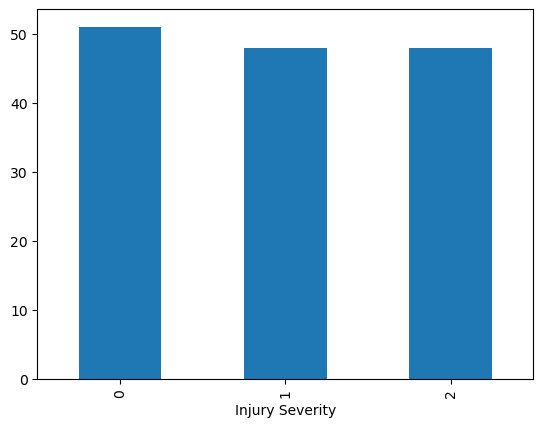

In [28]:
df['Injury Severity'].value_counts().plot(kind='bar')

<Axes: xlabel='Month', ylabel='No of Vehichles'>

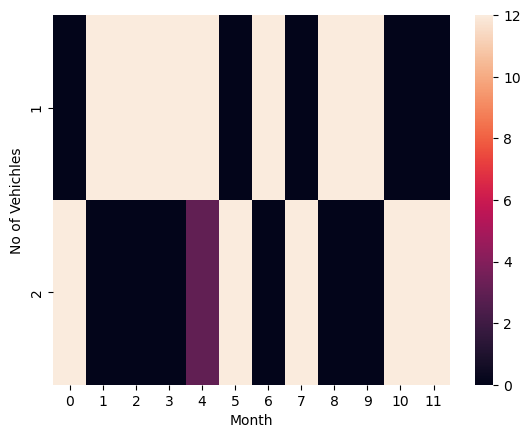

In [29]:
sns.heatmap(pd.crosstab(df['No of Vehichles'],df['Month']))

<Axes: xlabel='Contributing Factors', ylabel='Density'>

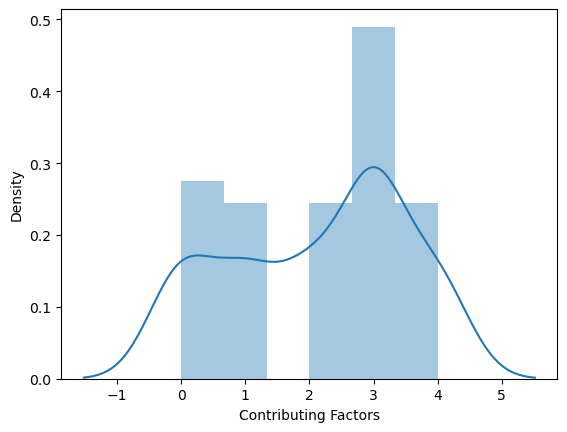

In [30]:
sns.distplot(df['Contributing Factors'])

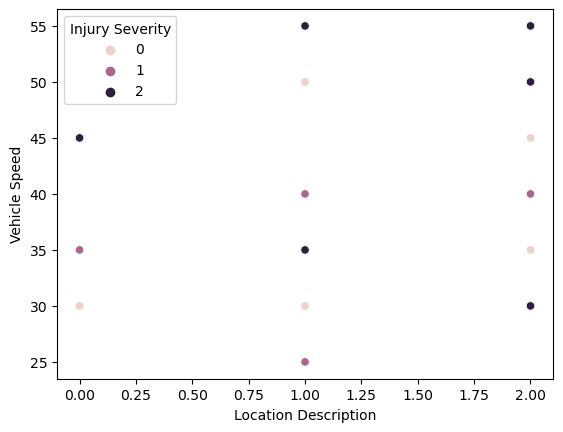

In [31]:
sns.scatterplot(x='Location Description', y='Vehicle Speed', hue='Injury Severity',data=df)
plt.show()

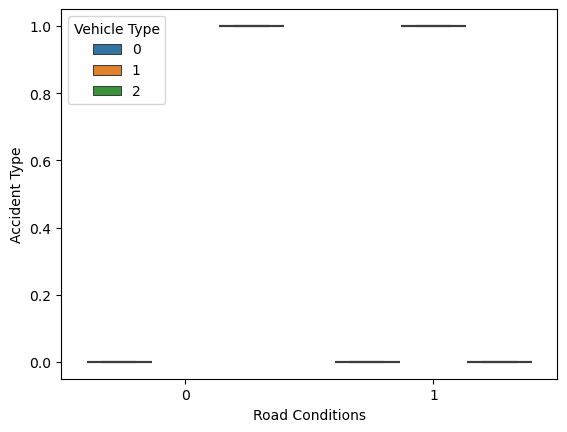

In [32]:
sns.boxplot(x='Road Conditions', y='Accident Type', hue='Vehicle Type', data=df)
plt.show()

(array([36., 27., 24., 24., 36.]),
 array([ 0. ,  2.2,  4.4,  6.6,  8.8, 11. ]),
 <BarContainer object of 5 artists>)

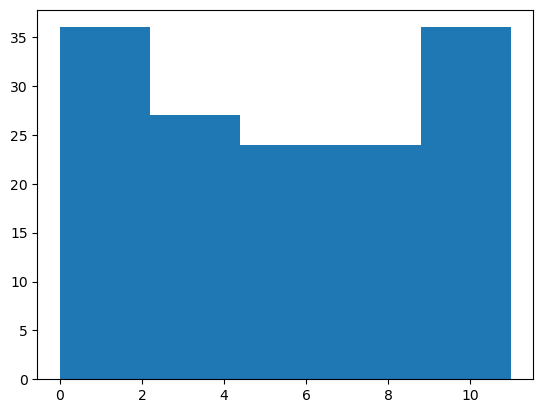

In [33]:
plt.hist(df['Month'],bins=5)

<Axes: xlabel='Road Conditions', ylabel='Density'>

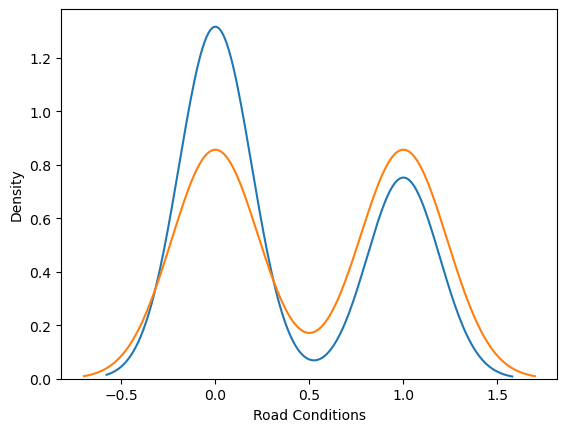

In [34]:
sns.distplot(df[df['Accident Type']==0]['Road Conditions'],hist=False)
sns.distplot(df[df['Accident Type']==1]['Road Conditions'],hist=False)

### drop columns

In [35]:
df.drop(['Day of Week','Month','Year','Latitude','Longitude','No of Vehichles'], axis=1, inplace=True)

In [36]:
df.head()

,Location Description,Weather Conditions,Road Conditions,Visibility,Accident Type,Injury Severity,Contributing Factors,Vehicle Type,Vehicle Speed
0,0,1,1,1,0,1,3,2,45
1,2,2,1,1,1,2,1,1,40
2,1,0,0,0,0,1,4,0,25
3,0,0,0,0,0,0,2,0,35
4,2,2,1,1,0,2,3,0,50


### Find-S algorithm

In [37]:
d = np.array(df)
print("n The attributes are: ",df)

n The attributes are:       Location Description  Weather Conditions  Road Conditions  Visibility  \
0                       0                   1                1           1   
1                       2                   2                1           1   
2                       1                   0                0           0   
3                       0                   0                0           0   
4                       2                   2                1           1   
..                    ...                 ...              ...         ...   
142                     2                   2                1           1   
143                     0                   0                0           0   
144                     2                   0                0           0   
145                     1                   2                1           1   
146                     0                   0                0           0   

     Accident Type  Injury Severity  Con

In [38]:
target = np.array(df['Injury Severity'])
print("n The target is: ",target)

n The target is:  [1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 0
 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 0
 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 0
 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0 1 2 1 0 2 0]


In [39]:
def train(c,t):
    for i, val in enumerate(t):
        if val == "Yes":
            specific_hypothesis = c[i].copy()
            break
    for i, val in enumerate(c):
        if t[i] == "Yes":
            for x in range(len(specific_hypothesis)):
                if val[x] != specific_hypothesis[x]:
                    specific_hypothesis[x] = '?'
                else:
                    pass
        return specific_hypothesis

In [40]:
print("\nThe Find S hyposthesis is as follows")
print("The final hypothesis is:",train)


The Find S hyposthesis is as follows
The final hypothesis is: <function train at 0x000001FACC896F20>
